In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
df = pd.read_csv(r"covid-19_vacinnation.csv")
df.head(10)

,Outcome,Weekend,Age Group,Unvaccinated Rate,Vaccinated Rate,Boosted Rate,Crude Vaccinated Ratio,Crude Boosted Ratio,Age-Adjusted Unvaccinated Rate,Age-Adjusted Vaccinated Rate,...,Age-Adjusted Vaccinated Ratio,Age-Adjusted Boosted Ratio,Population Unvaccinated,Population Vaccinated,Population Boosted,Outcome Unvaccinated,Outcome Vaccinated,Outcome Boosted,Age Group Min,Age Group Max
0,Deaths,10-01-22,All,0.3,0.1,0.9,3.0,0.3,0.4,0.3,...,1.3,0.7,591822,842535,1037067,2,1,9,999,999
1,Deaths,02-04-23,50_64,2.9,0.8,0.4,3.6,7.2,0.0,0.0,...,0.0,0.0,34169,125516,246849,1,1,1,50,64
2,Deaths,09-10-22,5_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,95349,82126,17689,0,0,0,5,11
3,Deaths,20-11-21,5_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,166798,1,0,0,0,0,5,11
4,Deaths,04-09-22,18_29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,98229,219416,147442,0,0,0,18,29
5,Hospitalizations,18-09-21,1_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,71650,87028,0,0,0,0,12,17
6,Cases,17-09-22,5_11,123.0,119.8,213.0,1.0,0.6,0.0,0.0,...,0.0,0.0,95128,81802,18308,117,98,39,5,11
7,Hospitalizations,12-04-21,30_49,37.7,3.8,0.0,9.9,0.0,0.0,0.0,...,0.0,0.0,185523,469462,103054,70,18,0,30,49
8,Cases,15-05-21,30_49,171.7,14.1,0.0,12.2,0.0,0.0,0.0,...,0.0,0.0,338871,332283,0,582,47,0,30,49
9,Hospitalizations,21-08-21,80+,34.6,15.1,0.0,2.3,0.0,0.0,0.0,...,0.0,0.0,31765,52936,0,11,8,0,80,200


In [8]:
print(df.isnull().sum())

Outcome                           0
Weekend                           0
Age Group                         0
Unvaccinated Rate                 0
Vaccinated Rate                   0
Boosted Rate                      0
Crude Vaccinated Ratio            0
Crude Boosted Ratio               0
Age-Adjusted Unvaccinated Rate    0
Age-Adjusted Vaccinated Rate      0
Age-Adjusted Boosted Rate         0
Age-Adjusted Vaccinated Ratio     0
Age-Adjusted Boosted Ratio        0
Population Unvaccinated           0
Population Vaccinated             0
Population Boosted                0
Outcome Unvaccinated              0
Outcome Vaccinated                0
Outcome Boosted                   0
Age Group Min                     0
Age Group Max                     0
dtype: int64


In [9]:
death_df = df[df['Outcome'] == 'Deaths']
vaccinated_deaths = death_df['Outcome Vaccinated'].dropna()
unvaccinated_deaths = death_df['Outcome Unvaccinated'].dropna()
t_stat, p_val = ttest_ind(unvaccinated_deaths, vaccinated_deaths, equal_var=False)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("There is a statistically significant difference in deaths between vaccinated and unvaccinated groups.")
else:
    print("There is no statistically significant difference in deaths between vaccinated and unvaccinated groups.")

T-statistic: 6.50
P-value: 0.0000
There is a statistically significant difference in deaths between vaccinated and unvaccinated groups.


C:\Users\praka\AppData\Local\Temp\ipykernel_6500\2190164761.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Weekend'])


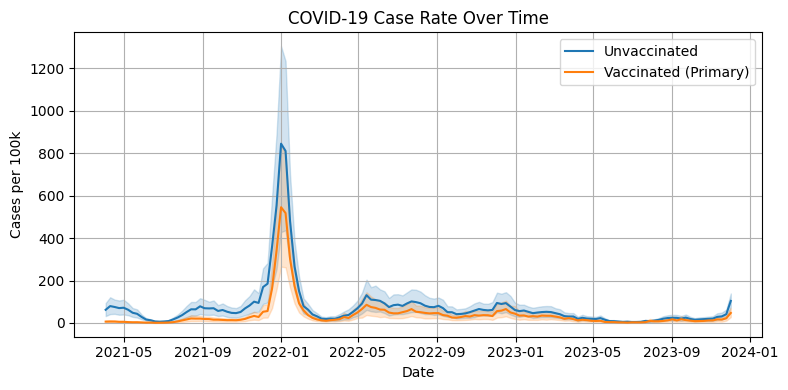

In [10]:
df['Date'] = pd.to_datetime(df['Weekend'])
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Date', y='Unvaccinated Rate', label='Unvaccinated')
sns.lineplot(data=df, x='Date', y='Vaccinated Rate', label='Vaccinated (Primary)')
plt.title('COVID-19 Case Rate Over Time')
plt.ylabel('Cases per 100k')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\praka\AppData\Local\Temp\ipykernel_6500\2201548883.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


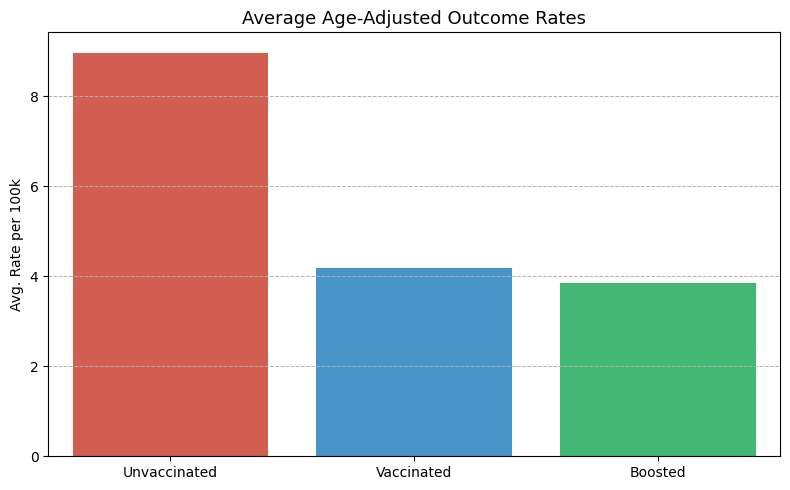

In [11]:
age_adjusted_avg = {
    'Unvaccinated': df['Age-Adjusted Unvaccinated Rate'].mean(),
    'Vaccinated': df['Age-Adjusted Vaccinated Rate'].mean(),
    'Boosted': df['Age-Adjusted Boosted Rate'].mean()
}

bar_colors = ['#e74c3c', '#3498db', '#2ecc71']
plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(age_adjusted_avg.keys()),
    y=list(age_adjusted_avg.values()),
    palette=bar_colors
)
plt.title('Average Age-Adjusted Outcome Rates', fontsize=13)
plt.ylabel('Avg. Rate per 100k')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

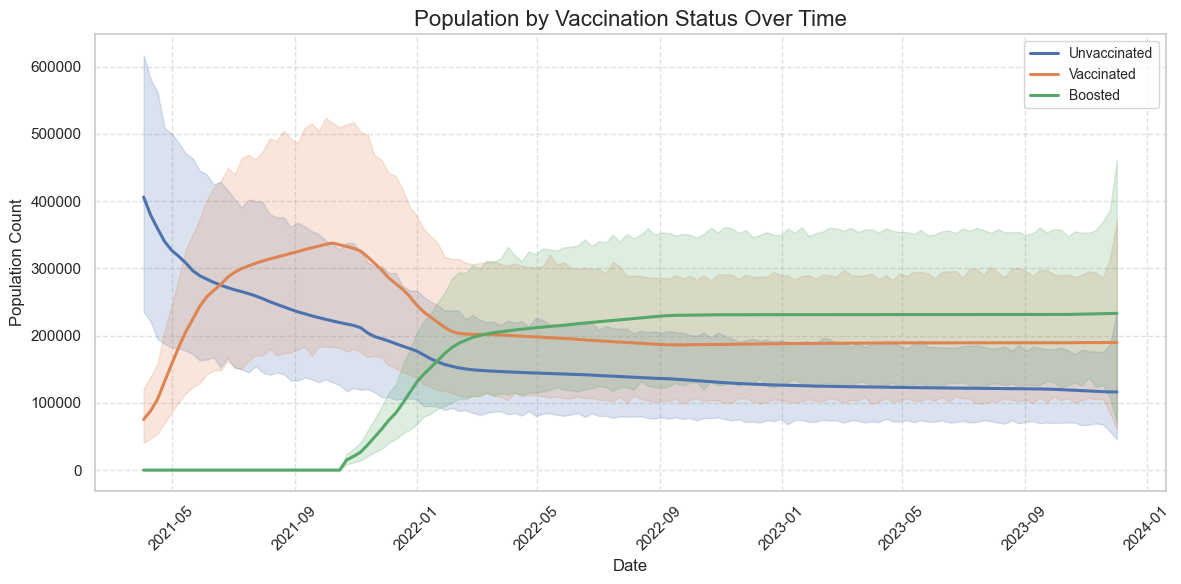

In [12]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Population Unvaccinated', label='Unvaccinated', linewidth=2.2)
sns.lineplot(data=df, x='Date', y='Population Vaccinated', label='Vaccinated', linewidth=2.2)
sns.lineplot(data=df, x='Date', y='Population Boosted', label='Boosted', linewidth=2.2)

plt.title('Population by Vaccination Status Over Time', fontsize=16)
plt.ylabel('Population Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

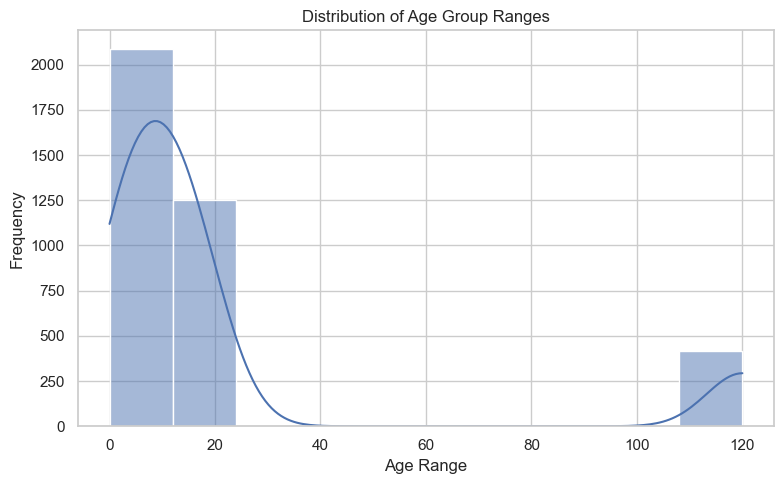

In [13]:
df['Age Range'] = df['Age Group Max'] - df['Age Group Min']
plt.figure(figsize=(8, 5))
sns.histplot(df['Age Range'], bins=10, kde=True)
plt.title('Distribution of Age Group Ranges')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


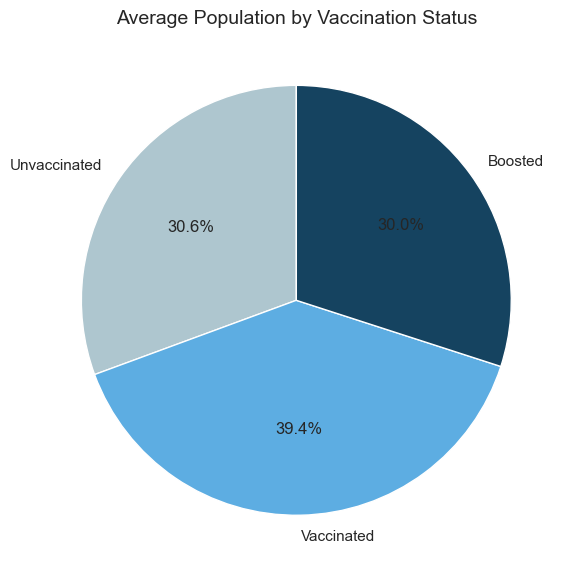

In [14]:
unvax_avg = df['Population Unvaccinated'].mean()
vax_avg = df['Population Vaccinated'].mean()
boosted_avg = df['Population Boosted'].mean()

pop_values = [unvax_avg, vax_avg, boosted_avg]
status_labels = ['Unvaccinated', 'Vaccinated', 'Boosted']
pie_colors = ['#aec6cf', '#5dade2', '#154360']

plt.figure(figsize=(6, 6))
plt.pie(
    pop_values,
    labels=status_labels,
    colors=pie_colors,
    autopct='%1.1f%%',
    startangle=90,
    shadow=False,
    wedgeprops=dict(edgecolor='white', linewidth=1)
)
plt.title('Average Population by Vaccination Status', fontsize=14)
plt.tight_layout()
plt.show()

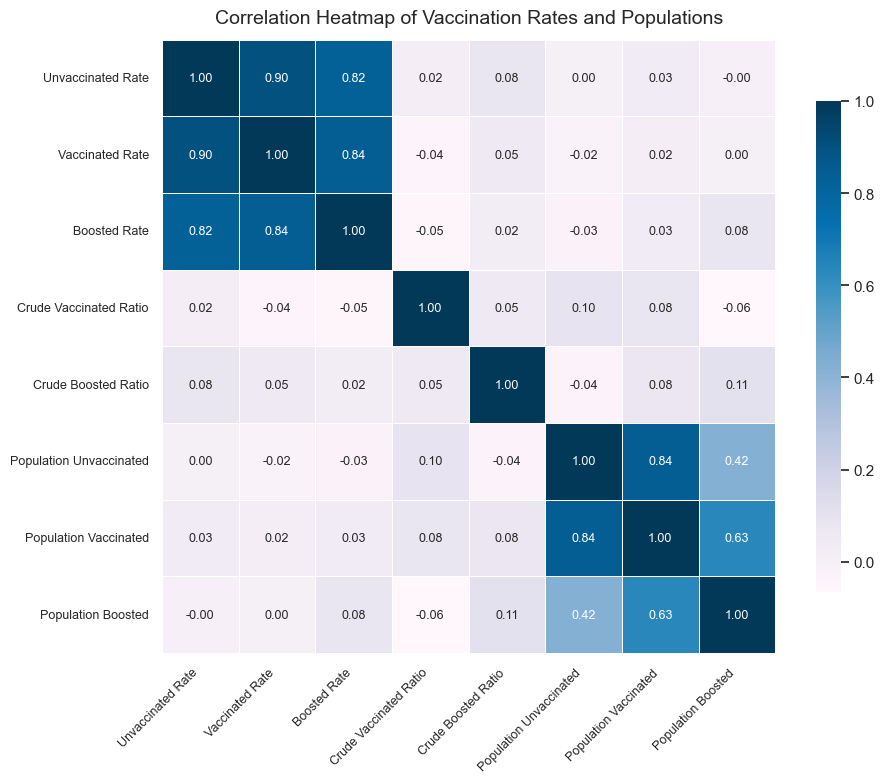

In [15]:
heatmap_cols = [
    'Unvaccinated Rate', 'Vaccinated Rate', 'Boosted Rate',
    'Crude Vaccinated Ratio', 'Crude Boosted Ratio',
    'Population Unvaccinated', 'Population Vaccinated', 'Population Boosted'
]
corr = df[heatmap_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='PuBu',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9}
)
plt.title('Correlation Heatmap of Vaccination Rates and Populations', fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

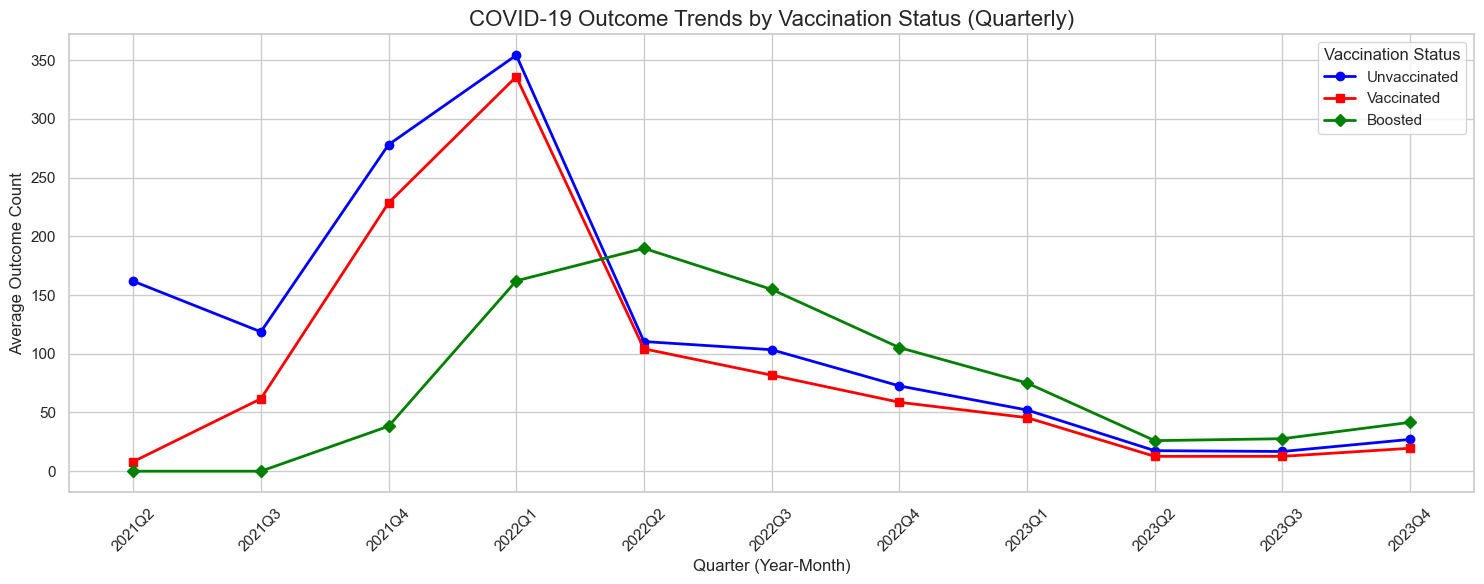

In [16]:
df['Quarter'] = df['Date'].dt.to_period('Q')
quarterly_df = df.groupby('Quarter')[['Outcome Unvaccinated', 'Outcome Vaccinated', 'Outcome Boosted']].mean().reset_index()
quarterly_df['Quarter'] = quarterly_df['Quarter'].astype(str)
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))
plt.plot(quarterly_df['Quarter'], quarterly_df['Outcome Unvaccinated'], label='Unvaccinated', color='blue', marker='o', linewidth=2)
plt.plot(quarterly_df['Quarter'], quarterly_df['Outcome Vaccinated'], label='Vaccinated', color='red', marker='s', linewidth=2)
plt.plot(quarterly_df['Quarter'], quarterly_df['Outcome Boosted'], label='Boosted', color='green', marker='D', linewidth=2)
plt.title('COVID-19 Outcome Trends by Vaccination Status (Quarterly)', fontsize=16)
plt.xlabel('Quarter (Year-Month)')
plt.ylabel('Average Outcome Count')
plt.legend(title='Vaccination Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\praka\AppData\Local\Temp\ipykernel_6500\3540345355.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Weekend'])
C:\Users\praka\AppData\Local\Temp\ipykernel_6500\3540345355.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_vax, x='Quarter', y='Total Vaccinated', palette='viridis')


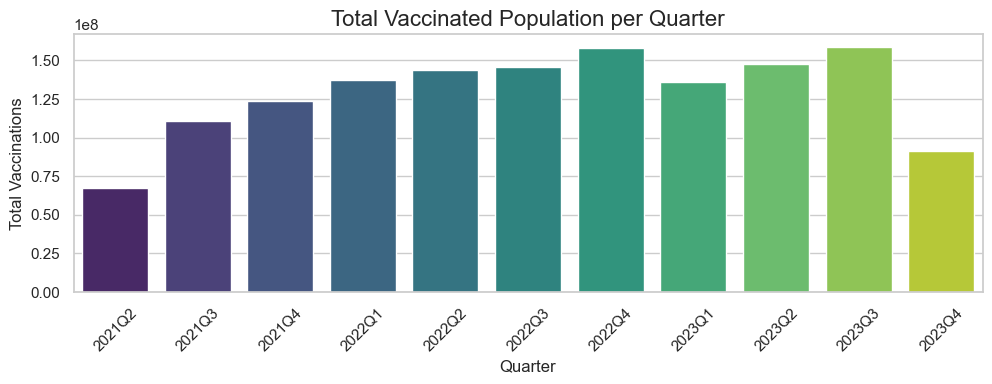

In [17]:

df['Date'] = pd.to_datetime(df['Weekend'])
df['Quarter'] = df['Date'].dt.to_period('Q')
df['Total Vaccinated'] = df['Population Vaccinated'] + df['Population Boosted']
quarterly_vax = df.groupby('Quarter')['Total Vaccinated'].sum().reset_index()
quarterly_vax['Quarter'] = quarterly_vax['Quarter'].astype(str)
plt.figure(figsize=(10, 4))
sns.barplot(data=quarterly_vax, x='Quarter', y='Total Vaccinated', palette='viridis')
plt.title('Total Vaccinated Population per Quarter', fontsize=16)
plt.xlabel('Quarter')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
